In [471]:
# lecture 12 is RF
# need to scale data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [478]:
RegularSeasonCompactResults = pd.read_csv("RegularSeasonCompactResults.csv")
TourneyCompactResults = pd.read_csv("TourneyCompactResults.csv")
Teams = pd.read_csv("Teams.csv")
Seasons = pd.read_csv("Seasons.csv")
TourneySlots = pd.read_csv("TourneySlots.csv")
TourneySeeds = pd.read_csv("TourneySeeds.csv")
RegularSeasonDetailedResults = pd.read_csv("RegularSeasonDetailedResults.csv")
TourneyDetailedResults = pd.read_csv("TourneyDetailedResults.csv")

In [373]:
print Teams.head()
print Seasons.head()
print TourneySlots.tail()
print TourneySeeds.tail()


   Team_Id    Team_Name
0     1101  Abilene Chr
1     1102    Air Force
2     1103        Akron
3     1104      Alabama
4     1105  Alabama A&M
   Season     Dayzero Regionw    Regionx    Regiony    Regionz
0    1985  10/29/1984    East       West    Midwest  Southeast
1    1986  10/28/1985    East    Midwest  Southeast       West
2    1987  10/27/1986    East  Southeast    Midwest       West
3    1988  11/02/1987    East    Midwest  Southeast       West
4    1989  10/31/1988    East       West    Midwest  Southeast
      Season  Slot Strongseed Weakseed
1978    2015  R4Y1       R3Y1     R3Y2
1979    2015  R4Z1       R3Z1     R3Z2
1980    2015  R5WX       R4W1     R4X1
1981    2015  R5YZ       R4Y1     R4Z1
1982    2015  R6CH       R5WX     R5YZ
      Season Seed  Team
2009    2015  Z12  1459
2010    2015  Z13  1217
2011    2015  Z14  1209
2012    2015  Z15  1411
2013    2015  Z16  1157


In [495]:
print RegularSeasonDetailedResults.tail()
#print RegularSeasonDetailedResults.describe()
print RegularSeasonDetailedResults.columns
print TourneyDetailedResults.tail()

       Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot  Wfgm  Wfga  \
65867    2015     132   1209      38   1204      36    N      0    15    46   
65868    2015     132   1246      78   1116      63    N      0    25    49   
65869    2015     132   1374      62   1163      54    N      0    18    51   
65870    2015     132   1433      71   1173      65    N      0    24    56   
65871    2015     132   1458      80   1277      69    N      1    25    52   

      ...   Lfga3  Lftm  Lfta  Lor  Ldr  Last  Lto  Lstl  Lblk  Lpf  
65867 ...      26     9    13   14   20     7    8     4     5   11  
65868 ...      13    11    17    9   11     5   12     4     3   22  
65869 ...      25    16    21    4   18     6    7     1     7   22  
65870 ...      12    21    27    8   22    10   10    11     2   16  
65871 ...      14     9     9    6   23    16   13     3     2   17  

[5 rows x 34 columns]
Index([u'Season', u'Daynum', u'Wteam', u'Wscore', u'Lteam', u'Lscore', u'Wloc',
  

In [4]:
print RegularSeasonCompactResults.head()

   Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot
0    1985      20   1228      81   1328      64    N      0
1    1985      25   1106      77   1354      70    H      0
2    1985      25   1112      63   1223      56    H      0
3    1985      25   1165      70   1432      54    H      0
4    1985      25   1192      86   1447      74    H      0


In [5]:
print TourneyCompactResults.head()


   Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot
0    1985     136   1116      63   1234      54    N      0
1    1985     136   1120      59   1345      58    N      0
2    1985     136   1207      68   1250      43    N      0
3    1985     136   1229      58   1425      55    N      0
4    1985     136   1242      49   1325      38    N      0


In [378]:
# submission file
# predict every possible game from 12, 13, 14, 15
#playoff_teams = TourneySeeds[TourneySeeds['Season'] == 2011]['Team'].sort_values(ascending=True)

# allow this to accept a list?
def SubmissionFile(season_year):
    playoff_teams = TourneySeeds[TourneySeeds['Season'] == season_year]['Team'].sort_values(ascending=True)
    Submission = []
    Prediction = []
    # select team column for each year
    x = playoff_teams
    # loop through each team
    for i in range(len(x)):
        # then loop down list of remaining teams
        for j in x[i+1:]:
            if x.iloc[i] < j:
                Submission.append('_'.join((str(season_year), str(x.iloc[i]), str(j))))
            else:
                Submission.append('_'.join((str(season_year),str(j),  str(x.iloc[i]))))
            Prediction.append(None)
    return pd.DataFrame({'Id': Submission,
                         'Pred': Prediction})
                
test = SubmissionFile(2011)
print test.head()

               Id  Pred
0  2011_1103_1106  None
1  2011_1103_1112  None
2  2011_1103_1114  None
3  2011_1103_1125  None
4  2011_1103_1131  None


In [366]:
# First two predictors
# Season win percentage
# Number of wins the last 6 games

season_matches = TourneyCompactResults[TourneyCompactResults['Season'] == 2011]
team = []
result = []
# print range(0, len(season_matches))

# expand to multiple seasons
def get_matches():
    for i in range(0, len(season_matches)):
        row = season_matches.iloc[i]
        # lowest team integer goes first
        if row['Wteam'] < row['Lteam']:
            team.append("2011" + "_" + str(row['Wteam']) + "_" + str(row['Lteam']))
            result.append(1)
        else:
            team.append("2011" + "_" + str(row['Lteam']) + "_" + str(row['Wteam']))
            result.append(0)
    return pd.DataFrame({'Game': team,
                         'Result': result})
matches = get_matches()  

In [391]:
# playoff teams
playoff_teams = TourneySeeds[TourneySeeds['Season'] == 2010]['Team'].sort_values(ascending=True)
print playoff_teams.tail()

# playoff seeds
seeds = TourneySeeds[TourneySeeds['Season']==2010]
print seeds.head()

1610    1452
1641    1457
1612    1458
1621    1459
1663    1462
Name: Team, dtype: int64
      Season Seed  Team
1609    2010  W01  1246
1610    2010  W02  1452
1611    2010  W03  1307
1612    2010  W04  1458
1613    2010  W05  1396


In [392]:
# regular season
season = RegularSeasonCompactResults[RegularSeasonCompactResults['Season'] == 2010]
print season.head()

        Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot
108122    2010       7   1143      75   1293      70    H      0
108123    2010       7   1314      88   1198      72    H      0
108124    2010       7   1326     100   1108      60    H      0
108125    2010       7   1393      75   1107      43    H      0
108126    2010       9   1143      95   1178      61    H      0


In [393]:
# wins by team
# https://statsguys.wordpress.com/2014/03/15/data-analytics-for-beginners-march-machine-learning-mania-part-ii/

wins_freq_table = pd.DataFrame.from_dict(season['Wteam'])

wins_by_team = wins_freq_table[wins_freq_table.Wteam.isin(playoff_teams)].stack().value_counts()

wins_by_team.head()

wins_by_team.index.name = 'Team'




In [394]:
# loses by team
loss_freq_table = pd.DataFrame.from_dict(season['Lteam'])
losses_by_team = loss_freq_table[loss_freq_table.Lteam.isin(playoff_teams)].stack().value_counts()

In [409]:
# Total win percentage
games_played = pd.Series(wins_by_team + losses_by_team)
# print games_played

total_winpct = wins_by_team / games_played
print total_winpct.head()

1115    0.531250
1124    0.774194
1139    0.875000
1140    0.848485
1143    0.696970
dtype: float64


In [33]:
# validate using SQL lite
from pandas.io import sql
import sqlite3

In [34]:
conn = sqlite3.connect('marchmadness.db', detect_types=sqlite3.PARSE_DECLTYPES)

In [35]:
season.to_sql('season',
            con=conn,
            if_exists='replace',
            index=False)

In [60]:
# what's the winning percentage for team 1462? 

a=sql.read_sql('''

select
  CAST(sum(win) as real) / count(Wteam),
  
from (
select
  Wteam,
  Lteam,
  case when Wteam==1462 then 1 else 0 end  as win
from season
where Wteam == 1462 or Lteam==1462)

''', con=conn)
a

,CAST(sum(win) as real) / count(Wteam),Wteam,Lteam
0,0.774194,1173,1462


In [410]:
total_winpct_by_team = pd.DataFrame({'winpct': total_winpct,
                                   'losses': losses_by_team})
print total_winpct_by_team.head()

      losses    winpct
1115      15  0.531250
1124       7  0.774194
1139       4  0.875000
1140       5  0.848485
1143      10  0.696970


In [194]:
# number of wins last 6 games
wins_last_six_games = {}
for p in playoff_teams:
    games = season[(season['Wteam']==p) | (season['Lteam']==p)]
   # print games
    num_wins = len(games.tail(6)[games['Wteam']==p])
    # print str(p) + ' ' + str(num_wins)
    wins_last_six_games.update({p:num_wins})
print wins_last_six_games

{1153: 4, 1155: 4, 1412: 4, 1287: 5, 1196: 4, 1163: 5, 1421: 6, 1294: 6, 1424: 5, 1425: 4, 1427: 5, 1429: 6, 1437: 1, 1433: 3, 1199: 3, 1114: 4, 1314: 5, 1435: 3, 1393: 5, 1449: 4, 1323: 5, 1324: 6, 1458: 4, 1326: 6, 1181: 4, 1330: 6, 1459: 6, 1206: 5, 1207: 1, 1208: 3, 1396: 4, 1338: 3, 1211: 6, 1214: 5, 1343: 5, 1417: 3, 1345: 4, 1462: 5, 1350: 6, 1400: 3, 1228: 2, 1281: 2, 1103: 4, 1232: 5, 1336: 4, 1106: 5, 1364: 4, 1112: 4, 1242: 6, 1243: 5, 1246: 6, 1125: 6, 1254: 6, 1361: 5, 1257: 4, 1131: 6, 1389: 4, 1452: 4, 1137: 6, 1266: 3, 1139: 6, 1140: 4, 1397: 3, 1385: 4, 1272: 4, 1401: 3, 1276: 4, 1277: 3}


In [328]:
# seed in tournament
pattern = "[A-Z]([0-9][0-9])"
team_seeds = seeds['Seed'].str.extract(pattern).to_frame()
seeds2 = team_seeds['Seed'].apply(int)
seeds['SeedsInt'] = seeds2team_seed = {}
print team_seed
# for p in playoff_teams:
    val = seeds.loc[seeds['Team'] == p]
    # print val
    zipped = dict(zip(val.Team,val.SeedsInt))
    team_seed.update(zipped)
#print team_seed[1412]
print team_seed

{}


/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [241]:
# combined all these together! 

w_six_df = pd.DataFrame.from_dict(wins_last_six_games, orient='index')
w_six_df.columns= ['wins_last_six_games']
#print w_six_df

team_seed_df = pd.DataFrame.from_dict(team_seed, orient='index')
team_seed_df.columns= ['Seed']
#print team_seed_df

team_metrics = pd.concat([w_six_df, team_seed_df,total_winpct_by_team], axis=1)
team_metrics.index.name ='Team'
# print team_metrics_home

print team_metrics.head()

      wins_last_six_games  Seed  losses    winpct
Team                                             
1103                    4    15      12  0.647059
1106                    5    16      17  0.468750
1112                    4     5       7  0.794118
1114                    4    16      16  0.515152
1125                    6    13       4  0.882353


In [239]:
# create train data set
print matches.head()

pattern = "[0-9]_([0-9]{4})_([0-9]{4})"
team_ids = matches['Game'].str.extract(pattern)
team_ids.columns = ['HomeID', 'AwayID']
print team_ids.head()

model_df = pd.concat([matches,team_ids], axis=1)
print model_df.head()



             Game  Result
0  2011_1155_1412       1
1  2011_1114_1421       0
2  2011_1106_1427       0
3  2011_1425_1433       0
4  2011_1139_1330       1
  HomeID AwayID
0   1155   1412
1   1114   1421
2   1106   1427
3   1425   1433
4   1139   1330
             Game  Result HomeID AwayID
0  2011_1155_1412       1   1155   1412
1  2011_1114_1421       0   1114   1421
2  2011_1106_1427       0   1106   1427
3  2011_1425_1433       0   1425   1433
4  2011_1139_1330       1   1139   1330


In [317]:
home_frame = pd.DataFrame()

# print team_metrics.loc[1155]

home_df = pd.DataFrame()
for i in model_df['HomeID']:
    t = team_metrics.loc[[int(i)]]
    home_df = pd.concat([home_df, t], axis=0)

home_df.columns = ['A_W6G', 'A_Seed', 'A_Losses', 'A_winpct']
home_df.index.name ='A_Team'

print home_df.head()
    
away_df = pd.DataFrame()
for i in model_df['AwayID']:
    t = team_metrics.loc[[int(i)]]
    away_df = pd.concat([away_df, t], axis=0)
    

away_df.columns = ['B_W6G', 'B_Seed', 'B_Losses', 'B_winpct']
away_df.index.name ='B_Team'

        A_W6G  A_Seed  A_Losses  A_winpct
A_Team                                   
1155        4      12        11  0.656250
1114        4      16        16  0.515152
1106        5      16        17  0.468750
1425        4      11        14  0.575758
1139        6       8         9  0.709677


In [319]:
model_df2 = pd.concat([model_df, home_df.reset_index(), away_df.reset_index()], axis=1)

In [321]:
model_df2.drop(['A_Team', 'B_Team'], axis=1, inplace=True)
print model_df2.head()

             Game  Result HomeID AwayID  A_W6G  A_Seed  A_Losses  A_winpct  \
0  2011_1155_1412       1   1155   1412      4      12        11  0.656250   
1  2011_1114_1421       0   1114   1421      4      16        16  0.515152   
2  2011_1106_1427       0   1106   1427      5      16        17  0.468750   
3  2011_1425_1433       0   1425   1433      4      11        14  0.575758   
4  2011_1139_1330       1   1139   1330      6       8         9  0.709677   

   B_W6G  B_Seed  B_Losses  B_winpct  
0      4      12         8  0.733333  
1      6      16        13  0.551724  
2      5      16        13  0.551724  
3      3      11        11  0.676471  
4      6       9         6  0.818182  


In [497]:
import itertools
for x, y in itertools.product([1,2,3], [1,2,3]):
    print x, y

1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3


In [954]:
print RegularSeasonDetailedResults.tail()
# get avg for each team

#Away Wins Winning Percentage
#Wins by margin less than 2
#Losses by margin less than 2
#Wins by margin greater than 7
#Losses by margin greater than 7
#Win Percentage in last 4 weeks
#Win Percentage against playoff teams

def get_seasons_avgs(season_year):
    season_detailed = RegularSeasonDetailedResults[RegularSeasonDetailedResults['Season'] == season_year]
    playoff_teams = TourneySeeds[TourneySeeds['Season'] == season_year]['Team'].sort_values(ascending=True)
    season_stats_full = pd.DataFrame({})
    winning_percentages_full = pd.DataFrame({})
    for p in playoff_teams:
        games = season_detailed[(season_detailed['Wteam']==p) | (season_detailed['Lteam']==p)]
        # field goals made
        fgm = []
        # field goals made
        fga = []
        # 3 points made
        fgm3 = []
        # 3 points made
        fga3 = []
        # free throws made
        ftm = []
        # free throws attempted
        fta = []
        # offensive rebounds
        ofr = []
        # defensive rebounds
        dr = []
        # assist
        ast = []
        # turn overs
        to = []
        # steals
        stl = []
        # blocks
        blk = []
        # personal fouls
        pf = []
        result = []
        stats = [fgm, fga, fgm3, fga3, ftm, fta, ofr, dr, ast, to, stl, blk, pf]
        # margin of victory/loss
        mov  = []
        # points scored
        p_score = []
        # points allowed
        p_allowed = []
        # loc
        loc = []
        # margin less than 2
        mltwo = []
        # margin greater than 7
        gtseven = []
        # opponent in tourney
        tourney_opponent = []
        columns = ["fgm", "fga", "fgm3", "fga3", "ftm", "fta", "or", "dr", "ast", "to", "stl", "blk", "pf"]
        for i in range(0, len(games)):
            row = games.iloc[i]
            # print row
            num_stats = len(stats)
            if row['Wteam'] == p:
                i = 0
                for s in stats:
                    s.append(row["W" + columns[i]])
                    i+=1
                result.append(1)
                loc.append(row['Wloc'])
                margin = row['Wscore'] - row['Lscore']
                mov.append(margin)
                p_score.append(row['Wscore'])
                p_allowed.append(row['Lscore'])
                if (margin) < 2:
                    mltwo.append(1)
                else: mltwo.append(0)
                if (margin) > 7:
                      gtseven.append(1)
                else: gtseven.append(0)
                if row['Lteam'] in list(playoff_teams):
                    tourney_opponent.append(1)
                else: tourney_opponent.append(0)
            if row['Lteam'] == p:
                i = 0
                for s in stats:
                    s.append(row["L" + columns[i]])
                    i+=1
                result.append(0)
                margin = row['Lscore'] - row['Wscore']
                mov.append(margin)
                if (margin) > -2:
                    mltwo.append(1)
                else: mltwo.append(0)
                if (margin) < -7:
                      gtseven.append(1)
                else: gtseven.append(0)
                if row['Wloc'] == 'H':
                    loc.append('A')
                elif row['Wloc'] =='A':
                    loc.append('H')
                else: loc.append(row['Wloc'])
                p_score.append(row['Lscore'])
                p_allowed.append(row['Wscore'])
                if row['Wteam'] in list(playoff_teams):
                    tourney_opponent.append(1)
                else: tourney_opponent.append(0)
        stats_per_game = pd.DataFrame({"team": p,
                                       "season": season_year,
                                       "result": result,
                                        "fgm": fgm,
                                       "fga": fga,
                                       "fgm3": fgm3,
                                       "fga3": fga3,
                                       "ftm": ftm,
                                       "fta": fta, 
                                       "or": ofr,
                                       "dr": dr,
                                       "ast": ast,
                                       "to": to,
                                       "stl": stl,
                                       "blk": blk,
                                       "pf": pf,
                                       "mov": mov,
                                       "p_score": p_score,
                                       "p_allowed": p_allowed
                                      })
        winning_percentage = pd.DataFrame({"team": p,
                                            "season": season_year,
                                            "result": result,
                                            'loc': loc,
                                            'mltwo': mltwo,
                                            'gtseven': gtseven,
                                            "tourney_opponent": tourney_opponent})
        wins_agg = winning_percentage.groupby(['team', 'result']).agg({
                "mltwo":"sum",
                "gtseven":"sum",
                "tourney_opponent":"sum"
            })
        # winning percentage against tourney teams
        wins_tourney_percent = wins_agg[['tourney_opponent']].loc[wins_agg.index.get_level_values('result') == 1] / wins_agg[['tourney_opponent']].sum()
        wins_tourney_percent.columns = ['tourney_opponent_win_percent']
        wins_tourney_percent['tourney_opponent_win_percent'].fillna(value=0.0, inplace=True)
        wins_marg = wins_agg[['mltwo', 'gtseven']].loc[wins_agg.index.get_level_values('result') == 1] 
       # wins_marg[['mltwo', 'gtseven']].fillna(value=0.0, inplace=True)
        loss_marg = wins_agg[['mltwo', 'gtseven']].loc[wins_agg.index.get_level_values('result') == 0] 
       # loss_marg[['mltwo', 'gtseven']].fillna(value=0.0, inplace=True)
        # need to combine these
        margin = wins_marg.reset_index(level='result').join(loss_marg.reset_index(level='result'), lsuffix='_win', rsuffix='_loss').drop(['result_win', 'result_loss'], axis=1, inplace=False)
        # away winning percentage
        away_games = winning_percentage[['team', 'result','loc']].loc[winning_percentage['loc']=='A'].groupby(['team', 'result']).count()
        away_win_percent = away_games[['loc']].loc[away_games.index.get_level_values('result')==1] / away_games[['loc']].sum()
        away_win_percent.columns = ['away_win_percent']
        wins_percentages = margin.join(away_win_percent.reset_index(level='result')).drop('result', axis=1, inplace=False)
        wins_percentages = wins_percentages.join(wins_tourney_percent.reset_index(level='result')).drop('result', axis=1, inplace=False)
        
        winning_percentages_full = pd.concat([winning_percentages_full, wins_percentages], axis=0)
        season_stats_full = pd.concat([season_stats_full, stats_per_game], axis=0)               
    # winning_percentages_full[['tourney_opponent_win_percent','mltwo_win', 'mltwo_loss', 'gtseven_win', 'gtseven_loss']].fillna(value=0, inplace=True)
    season_stats_full_avg = season_stats_full.groupby(['team']).mean()
    return_model_df = season_stats_full_avg.join(winning_percentages_full)
    return_model_df.fillna(value=0.0, inplace=True)
    return_model_df.drop('result', axis=1, inplace=True)
    return return_model_df

a = get_seasons_avgs(2014)
print a.loc[1455]

       Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot  Wfgm  Wfga  \
65867    2015     132   1209      38   1204      36    N      0    15    46   
65868    2015     132   1246      78   1116      63    N      0    25    49   
65869    2015     132   1374      62   1163      54    N      0    18    51   
65870    2015     132   1433      71   1173      65    N      0    24    56   
65871    2015     132   1458      80   1277      69    N      1    25    52   

      ...   Lfga3  Lftm  Lfta  Lor  Ldr  Last  Lto  Lstl  Lblk  Lpf  
65867 ...      26     9    13   14   20     7    8     4     5   11  
65868 ...      13    11    17    9   11     5   12     4     3   22  
65869 ...      25    16    21    4   18     6    7     1     7   22  
65870 ...      12    21    27    8   22    10   10    11     2   16  
65871 ...      14     9     9    6   23    16   13     3     2   17  

[5 rows x 34 columns]
ast                               13.363636
blk                                5.1

In [945]:
# function to make the data sets from above


def metrics_by_season(season_year):
    playoff_teams = TourneySeeds[TourneySeeds['Season'] == season_year]['Team'].sort_values(ascending=True)
    seeds = TourneySeeds[TourneySeeds['Season'] == season_year]
    season = RegularSeasonCompactResults[RegularSeasonCompactResults['Season'] == season_year]
    # create metrics
    # wins
    wins_freq_table = pd.DataFrame.from_dict(season['Wteam'])
    wins_by_team = wins_freq_table[wins_freq_table.Wteam.isin(playoff_teams)].stack().value_counts()
    wins_by_team.fillna(value=0, inplace=True)
    wins_by_team.index.name = 'Team'
    # losses
    loss_freq_table = pd.DataFrame.from_dict(season['Lteam'])
    losses_by_team = loss_freq_table[loss_freq_table.Lteam.isin(playoff_teams)].stack().value_counts()
    losses_by_team.fillna(value=0, inplace=True)
    losses_by_team.index.name = 'Team'
    games_played_series = wins_by_team.align(losses_by_team, fill_value=0)
    games_played = pd.Series(games_played_series[0] + games_played_series[1])
    # winning %
    total_winpct = wins_by_team / games_played
    # number of wins the last 6 games
    wins_last_six_games = {}
    for p in playoff_teams:
        games = season[(season['Wteam']==p) | (season['Lteam']==p)]
        num_wins = len(games.tail(6)[games['Wteam']==p])
        wins_last_six_games.update({p:num_wins})
    # seed
    pattern = "[A-Z]([0-9][0-9])"
    team_seeds = seeds['Seed'].str.extract(pattern).to_frame()
    seeds2 = team_seeds['Seed'].apply(int)
    seeds['SeedsInt'] = seeds2
    team_seed = {}
    for p in playoff_teams:
        val = seeds.loc[seeds['Team'] == p]
        zipped = dict(zip(val.Team,val.SeedsInt))
        team_seed.update(zipped)
    # combine into data frame
    total_winpct_by_team = pd.DataFrame({'winpct': total_winpct,
                                   'losses': games_played_series[1]})
    w_six_df = pd.DataFrame.from_dict(wins_last_six_games, orient='index')
    w_six_df.columns= ['wins_last_six_games']
    team_seed_df = pd.DataFrame.from_dict(team_seed, orient='index')
    team_seed_df.columns= ['Seed']
    team_metrics = pd.concat([w_six_df, team_seed_df, total_winpct_by_team], axis=1)
    team_metrics.index.name ='Team'
    return team_metrics

t1 = metrics_by_season(2014)
print t1.loc[1455]

wins_last_six_games    6
Seed                   1
losses                 0
winpct                 1
Name: 1455, dtype: float64


/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
#Away Wins Winning Percentage
#Wins by margin less than 2
#Losses by margin less than 2
#Wins by margin greater than 7
#Losses by margin greater than 7
#Win Percentage in last 4 weeks
#Win Percentage against playoff teams
#Number of wins in last 6 games of the season
#Seed in Tournament
#Wins in Tournament

In [962]:
# build training dataset

def build_training_data(season_year_list):
    return_model_df = pd.DataFrame({})
    for season_year in season_year_list:
        team_metrics = metrics_by_season(season_year)
        team_season_stats = get_seasons_avgs(season_year)
        team_metrics_away = team_metrics.copy()
        team_season_stats_away = team_season_stats.copy()
        season_matches = TourneyCompactResults[TourneyCompactResults['Season'] == season_year]
        team = []
        result = []
        for i in range(0, len(season_matches)):
                row = season_matches.iloc[i]
                # lowest team integer goes first
                if row['Wteam'] < row['Lteam']:
                    team.append(str(season_year) + "_" + str(row['Wteam']) + "_" + str(row['Lteam']))
                    result.append(1)
                else:
                    team.append(str(season_year) + "_" + str(row['Lteam']) + "_" + str(row['Wteam']))
                    result.append(0)
        model_df =  pd.DataFrame({'Game': team,
                             'Result': result})
        pattern = "[0-9]_([0-9]{4})_([0-9]{4})"
        team_ids = model_df['Game'].str.extract(pattern)
        team_ids.columns = ['HomeID', 'AwayID']
        model_df = pd.concat([model_df,team_ids], axis=1)
        home_df = pd.DataFrame()
        for i in model_df['HomeID']:
            t = team_metrics.loc[[int(i)]]
            avg = team_season_stats.loc[[int(i)]]
            combine_stats = t.join(avg, how='inner')
            home_df = pd.concat([home_df, combine_stats], axis=0)  
        home_df.columns =  ['A_W6G',  'A_Seed',  'A_Losses', 'A_winpct', 'A_ast', 'A_blk', 'A_dr', 'A_fga', 'A_fga3', 'A_fgm', 'A_fgm3','A_fta', 'A_ftm', 'A_mov', 'A_or', 'A_p_allowed', 'A_p_score', 'A_pf', 'A_season', 'A_stl', 'A_to', 'A_mltwo_win', 'A_gtseven_win', 'A_mltwo_loss', 'A_gtseven_loss', 'A_away_win_percent', 'A_tourney_opponent_win_percent']
        home_df.index.name ='A_Team'
        away_df = pd.DataFrame()
        for i in model_df['AwayID']:
            t = team_metrics_away.loc[[int(i)]]
            avg = team_season_stats_away.loc[[int(i)]]
            combine_stats = t.join(avg, how='inner')
            away_df = pd.concat([away_df, combine_stats], axis=0)
        away_df.columns = ['B_W6G',  'B_Seed',  'B_Losses',   'B_winpct', 'B_ast', 'B_blk', 'B_dr', 'B_fga', 'B_fga3', 'B_fgm', 'B_fgm3','B_fta', 'B_ftm', 'B_mov', 'B_or', 'B_p_allowed', 'B_p_score', 'B_pf', 'B_season', 'B_stl', 'B_to', 'B_mltwo_win', 'B_gtseven_win', 'B_mltwo_loss', 'B_gtseven_loss', 'B_away_win_percent', 'B_tourney_opponent_win_percent']
        away_df.index.name ='B_Team'
        concat_df = pd.concat([home_df.reset_index(), away_df.reset_index()], axis=1)
        model_df = pd.concat([model_df, concat_df], axis=1)
       #  model_df.drop(['A_Team', 'B_Team'], axis=1, inplace=True)
        return_model_df = pd.concat([return_model_df, model_df], axis=0)
        return_model_df.fillna(0, inplace=True)
    return return_model_df

b = build_training_data([2010, 2011, 2012, 2013, 2014])


#print build_training_data([2010, 2011, 2012]).tail()

#print b.head()
#print b.tail()

print b.head()



/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


             Game  Result HomeID AwayID  A_Team  A_W6G  A_Seed  A_Losses  \
0  2010_1115_1457       1   1115   1457    1115      5      16        15   
1  2010_1124_1358       1   1124   1358    1124      5       3         7   
2  2010_1139_1431       1   1139   1431    1139      6       5         4   
3  2010_1140_1196       1   1140   1196    1140      4       7         5   
4  2010_1242_1250       1   1242   1250    1242      5       1         2   

   A_winpct      A_ast               ...                     B_pf  B_season  \
0  0.531250  12.531250               ...                18.966667      2010   
1  0.774194  13.645161               ...                20.571429      2010   
2  0.875000  12.812500               ...                19.343750      2010   
3  0.848485  15.787879               ...                14.454545      2010   
4  0.941176  17.147059               ...                17.906250      2010   

      B_stl       B_to  B_mltwo_win  B_gtseven_win  B_mltwo_loss  \


In [960]:
# BUILD TEST DATA FRAME
def test_frame_model(season_year_list):
    return_model_df = pd.DataFrame({})
    for season_year in season_year_list:
        model_df = SubmissionFile(season_year)
        model_df.columns = ['Game', 'Prediction']
        team_metrics = metrics_by_season(season_year)
        team_metrics_away = team_metrics.copy()
        team_season_stats = get_seasons_avgs(season_year)
        team_season_stats_away = team_season_stats.copy()
        pattern = "[0-9]_([0-9]{4})_([0-9]{4})"
        team_ids = model_df['Game'].str.extract(pattern)
        team_ids.columns = ['HomeID', 'AwayID']
        model_df = pd.concat([model_df,team_ids], axis=1)
        home_df = pd.DataFrame()
        for i in model_df['HomeID']:
            t = team_metrics.loc[[int(i)]]
            avg = team_season_stats.loc[[int(i)]]
            combine_stats = t.join(avg, how='inner')
            home_df = pd.concat([home_df, combine_stats], axis=0)  
        home_df.columns =  ['A_W6G',  'A_Seed',  'A_Losses', 'A_winpct', 'A_ast', 'A_blk', 'A_dr', 'A_fga', 'A_fga3', 'A_fgm', 'A_fgm3','A_fta', 'A_ftm', 'A_mov', 'A_or', 'A_p_allowed', 'A_p_score', 'A_pf', 'A_season', 'A_stl', 'A_to',  'A_mltwo_win', 'A_gtseven_win', 'A_mltwo_loss', 'A_gtseven_loss', 'A_away_win_percent', 'A_tourney_opponent_win_percent']
        home_df.index.name ='A_Team'
        away_df = pd.DataFrame()
        for i in model_df['AwayID']:
            t = team_metrics_away.loc[[int(i)]]
            avg = team_season_stats_away.loc[[int(i)]]
            combine_stats = t.join(avg, how='inner')
            away_df = pd.concat([away_df, combine_stats], axis=0)
        away_df.columns = ['B_W6G',  'B_Seed',  'B_Losses',   'B_winpct', 'B_ast', 'B_blk', 'B_dr', 'B_fga', 'B_fga3', 'B_fgm', 'B_fgm3','B_fta', 'B_ftm', 'B_mov', 'B_or', 'B_p_allowed', 'B_p_score', 'B_pf', 'B_season', 'B_stl', 'B_to', 'B_mltwo_win', 'B_gtseven_win', 'B_mltwo_loss', 'B_gtseven_loss', 'B_away_win_percent', 'B_tourney_opponent_win_percent']
        away_df.index.name ='B_Team'
        concat_df = pd.concat([home_df.reset_index(), away_df.reset_index()], axis=1)
        model_df = pd.concat([model_df, concat_df], axis=1)
        return_model_df = pd.concat([return_model_df, model_df], axis=0)
      #  model_df.drop(['A_Team', 'B_Team'], axis=1, inplace=True)
    return return_model_df

a = test_frame_model([2011, 2012])
print a.columns
print a.head()
print a.tail()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Index([u'Game', u'Prediction', u'HomeID', u'AwayID', u'A_Team', u'A_W6G',
       u'A_Seed', u'A_Losses', u'A_winpct', u'A_ast', u'A_blk', u'A_dr',
       u'A_fga', u'A_fga3', u'A_fgm', u'A_fgm3', u'A_fta', u'A_ftm', u'A_mov',
       u'A_or', u'A_p_allowed', u'A_p_score', u'A_pf', u'A_season', u'A_stl',
       u'A_to', u'A_mltwo_win', u'A_gtseven_win', u'A_mltwo_loss',
       u'A_gtseven_loss', u'A_away_win_percent',
       u'A_tourney_opponent_win_percent', u'B_Team', u'B_W6G', u'B_Seed',
       u'B_Losses', u'B_winpct', u'B_ast', u'B_blk', u'B_dr', u'B_fga',
       u'B_fga3', u'B_fgm', u'B_fgm3', u'B_fta', u'B_ftm', u'B_mov', u'B_or',
       u'B_p_allowed', u'B_p_score', u'B_pf', u'B_season', u'B_stl', u'B_to',
       u'B_mltwo_win', u'B_gtseven_win', u'B_mltwo_loss', u'B_gtseven_loss',
       u'B_away_win_percent', u'B_tourney_opponent_win_percent'],
      dtype='object')
             Game Prediction HomeID AwayID  A_Team  A_W6G  A_Seed  A_Losses  \
0  2011_1103_1106       None   110

In [991]:
# Get training data
Train = build_training_data([2012, 2013, 2014])
Test = build_training_data([2015])

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [992]:
y = Train['Result']

X = Train.drop(['Game', 'Result', 'HomeID', 'AwayID', 'A_season', 'B_season', 'A_Team', 'B_Team'], axis=1)

X_test = Test.drop(['Game', 'Result', 'HomeID', 'AwayID', 'A_season', 'B_season', 'A_Team', 'B_Team'], axis=1)

y_test = Test['Result']



In [965]:
print X.head()
print y.head()

print pd.isnull(X).any(1).nonzero()[0]
print X.iloc[[169, 181]]

   A_W6G  A_Seed  A_Losses  A_winpct      A_ast     A_blk       A_dr  \
0      4      14         8  0.741935  17.032258  4.193548  27.096774   
1      5      16        12  0.636364  13.303030  2.393939  23.878788   
2      3      12         9  0.727273  16.060606  3.151515  24.909091   
3      6      16        11  0.656250  12.437500  4.375000  25.250000   
4      4       3         7  0.787879  14.727273  4.636364  23.909091   

       A_fga     A_fga3      A_fgm               ...                B_p_score  \
0  60.032258  19.548387  27.967742               ...                83.250000   
1  59.515152  22.878788  23.939394               ...                65.060606   
2  55.151515  12.606061  26.424242               ...                58.812500   
3  59.093750  12.812500  25.375000               ...                67.235294   
4  56.000000  17.848485  26.090909               ...                76.375000   

        B_pf     B_stl       B_to  B_mltwo_win  B_gtseven_win  B_mltwo_loss  \
0

In [1051]:
# Try decision trees
from sklearn.tree import DecisionTreeClassifier
TreeClass = DecisionTreeClassifier(
                max_depth = 5,
                min_samples_leaf = 2)



In [1052]:
TreeClass.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [1053]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(TreeClass, X, y, cv=10)
# this is precision
print(scores.mean())

0.575789473684


In [1054]:

print TreeClass.score(X_test, y_test)

0.597014925373


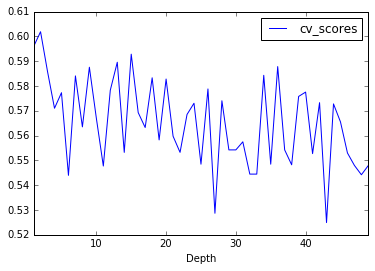

In [1055]:
# tune decision tree
Depth = range(1,50)
score = []
for i in Depth:
      TreeClass = DecisionTreeClassifier(
                max_depth = i,
                min_samples_leaf = 2)
        # default scoring for classifications is precision
      scores = cross_val_score(TreeClass, X, y, cv=10)
      score.append(np.mean(scores))

Depth_Choice_df = pd.DataFrame({'cv_scores': score ,'Depth': Depth})
Depth_Choice_df.plot(x ='Depth',y = 'cv_scores' )

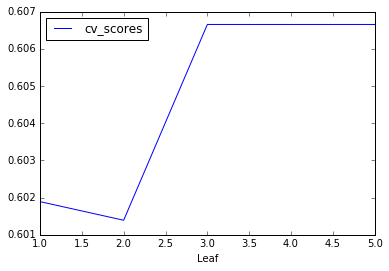

In [1056]:
# tune decision tree
Leaf = [1, 2, 3, 4, 5]
score = []
for i in Leaf:
      TreeClass = DecisionTreeClassifier(
                max_depth = 2,
                min_samples_leaf = i)
        # default scoring for classifications is precision
      scores = cross_val_score(TreeClass, X, y, cv=10)
      score.append(np.mean(scores))

Depth_Choice_df = pd.DataFrame({'cv_scores': score ,'Leaf': Leaf})
Depth_Choice_df.plot(x ='Leaf',y = 'cv_scores' )

In [1057]:
# refit based on tuned parameters
TreeClass = DecisionTreeClassifier(
                max_depth = 1,
                min_samples_leaf = 3)
TreeClass.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [1058]:
# cross val
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(TreeClass, X, y, cv=10)
# this is precision
print(scores.mean())

0.595864661654


In [1059]:
# test data set

print TreeClass.score(X_test, y_test)

0.686567164179


In [1078]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
RFClass = RandomForestClassifier(n_estimators = 1000, 
                                 # max_features = 15, # You can set it to a number or 'sqrt', 'log2', etc
                                 min_samples_leaf = 3,
                                 oob_score = True)
RFClass.fit(X,y)
print(RFClass.oob_score_)
scores = cross_val_score(RFClass, X, y, cv=10)
print(scores.mean())

0.601990049751
0.62015037594


In [1079]:
print RFClass.oob_score_ 
print RFClass.score(X_test, y_test)


0.601990049751
0.776119402985


In [1062]:
sorted(zip(RFClass.feature_importances_,X.columns.values))

[(0.0013526942855072979, 'B_mltwo_loss'),
 (0.0039923121130993498, 'A_mltwo_loss'),
 (0.0054933348178865483, 'A_Losses'),
 (0.0056075382126947893, 'A_gtseven_loss'),
 (0.005736924649029764, 'B_W6G'),
 (0.005758612827489247, 'B_gtseven_loss'),
 (0.0059690203700913623, 'B_Losses'),
 (0.00810846521898664, 'B_mltwo_win'),
 (0.010305807294591145, 'A_W6G'),
 (0.010924946302140961, 'A_mltwo_win'),
 (0.011634617646685606, 'A_gtseven_win'),
 (0.011747892627709351, 'A_ast'),
 (0.01228139609728998, 'B_stl'),
 (0.012889151366677197, 'B_fta'),
 (0.013134769043214032, 'B_winpct'),
 (0.013449921626313321, 'A_winpct'),
 (0.013462355225504275, 'A_away_win_percent'),
 (0.013729842074041501, 'B_away_win_percent'),
 (0.014005254832206288, 'A_fga3'),
 (0.014165482816468417, 'B_ftm'),
 (0.014324123793076713, 'A_fta'),
 (0.014402535371976112, 'B_tourney_opponent_win_percent'),
 (0.014471217847356973, 'B_p_score'),
 (0.014483661024087649, 'B_to'),
 (0.014857020008970826, 'B_fgm3'),
 (0.015175685609078178, 'A_

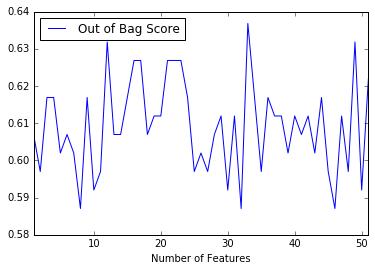

In [1083]:
from sklearn.cross_validation import cross_val_score
Features = range(1,52)
oob_score_RF = []
for i in Features:
        RFClass = RandomForestClassifier(n_estimators = 1000, #Number of trees - the more the better!
                           max_features = i,     #How many features to randomly choose in each node 
                           min_samples_leaf = 3, #Minimum number of observations at each terminal node
                           oob_score = True)
        RFClass.fit(X,y)  
        oob_score_RF.append(RFClass.oob_score_)

Depth_Choice_df = pd.DataFrame({'Out of Bag Score': oob_score_RF ,'Number of Features': Features})
Depth_Choice_df.plot(x ='Number of Features',y = 'Out of Bag Score' )


In [1100]:
# choose 8 features
from sklearn.ensemble import RandomForestClassifier
RFClass = RandomForestClassifier(n_estimators = 1000, 
                                 max_features = 11, # You can set it to a number or 'sqrt', 'log2', etc
                                 min_samples_leaf = 3,
                                 oob_score = True)
RFClass.fit(X,y)
print(RFClass.oob_score_)
scores = cross_val_score(RFClass, X, y, cv=10)
print(scores.mean())
print RFClass.score(X_test, y_test)

0.587064676617
0.614887218045
0.731343283582


0.834229390681


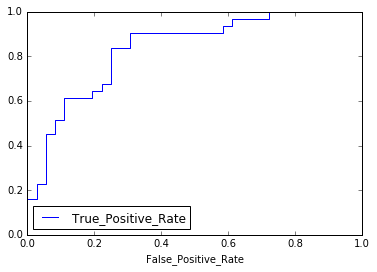

In [1098]:
# ROC curves
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_hat_probability = RFClass.predict_proba(X_test).T[1] #  returns probability of belonging to class
#print(y_hat_probability)
print(roc_auc_score(y_test, y_hat_probability))
vals = roc_curve(y_test, y_hat_probability)
Roc_DataFrame = pd.DataFrame({'False_Positive_Rate':vals[0],'True_Positive_Rate':vals[1]})
Roc_DataFrame.plot(x = 'False_Positive_Rate' , y = 'True_Positive_Rate' ) #again beautiful Graph